In [1]:
import pandas as pd


import warnings
warnings.filterwarnings('ignore')

C:\Users\User\AppData\Local\Temp\ipykernel_1008\657383914.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv('data/data_indexes_moex_log_returns.csv', index_col=0)

In [3]:
data.head()

,MOEXRE,MOEXMM,MOEXIT,MOEXFN,MOEXEU,MOEXCN,MOEXCH,MOEXOG,MOEXTL,MOEXTN
TRADEDATE,,,,,,,,,,
2004-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-11,NaN,NaN,NaN,NaN,NaN,0.000240,NaN,NaN,NaN,NaN
2005-01-12,NaN,-0.013441,NaN,-0.009810,-0.009228,-0.002904,NaN,0.002142,-0.011152,NaN
2005-01-13,NaN,-0.005678,NaN,-0.002032,-0.001432,0.004222,NaN,-0.000822,-0.002205,NaN


In [4]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

data.index = pd.to_datetime(data.index)


In [5]:
# На выходе мы получим статистику теста Дики-Фуллера и p-значение. Если p-значение меньше уровня значимости (обычно 0.05), 
# то мы можем отклонить нулевую гипотезу о нестационарности ряда и считать его стационарным.
p_values = []
ADF_Statistic = []

for col in data.columns:
    ts = data[col].interpolate(method='time').dropna()

    result = adfuller(ts)

    p_values.append(round(result[1], 5))
    
    ADF_Statistic.append(round(result[0], 5))

p_values_ser = pd.Series(p_values, index = data.columns, name='p-values')
ADF_Statistic_ser = pd.Series(ADF_Statistic, index = data.columns, name='ADF_Statistic')
result = pd.DataFrame([p_values_ser, ADF_Statistic_ser])
result

,MOEXRE,MOEXMM,MOEXIT,MOEXFN,MOEXEU,MOEXCN,MOEXCH,MOEXOG,MOEXTL,MOEXTN
p-values,0.00000,0.00000,0.00029,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000
ADF_Statistic,-9.95588,-10.76917,-4.40589,-10.42624,-11.78531,-11.42489,-9.25113,-11.07019,-10.5558,-21.35166


In [6]:
from statsmodels.graphics import tsaplots


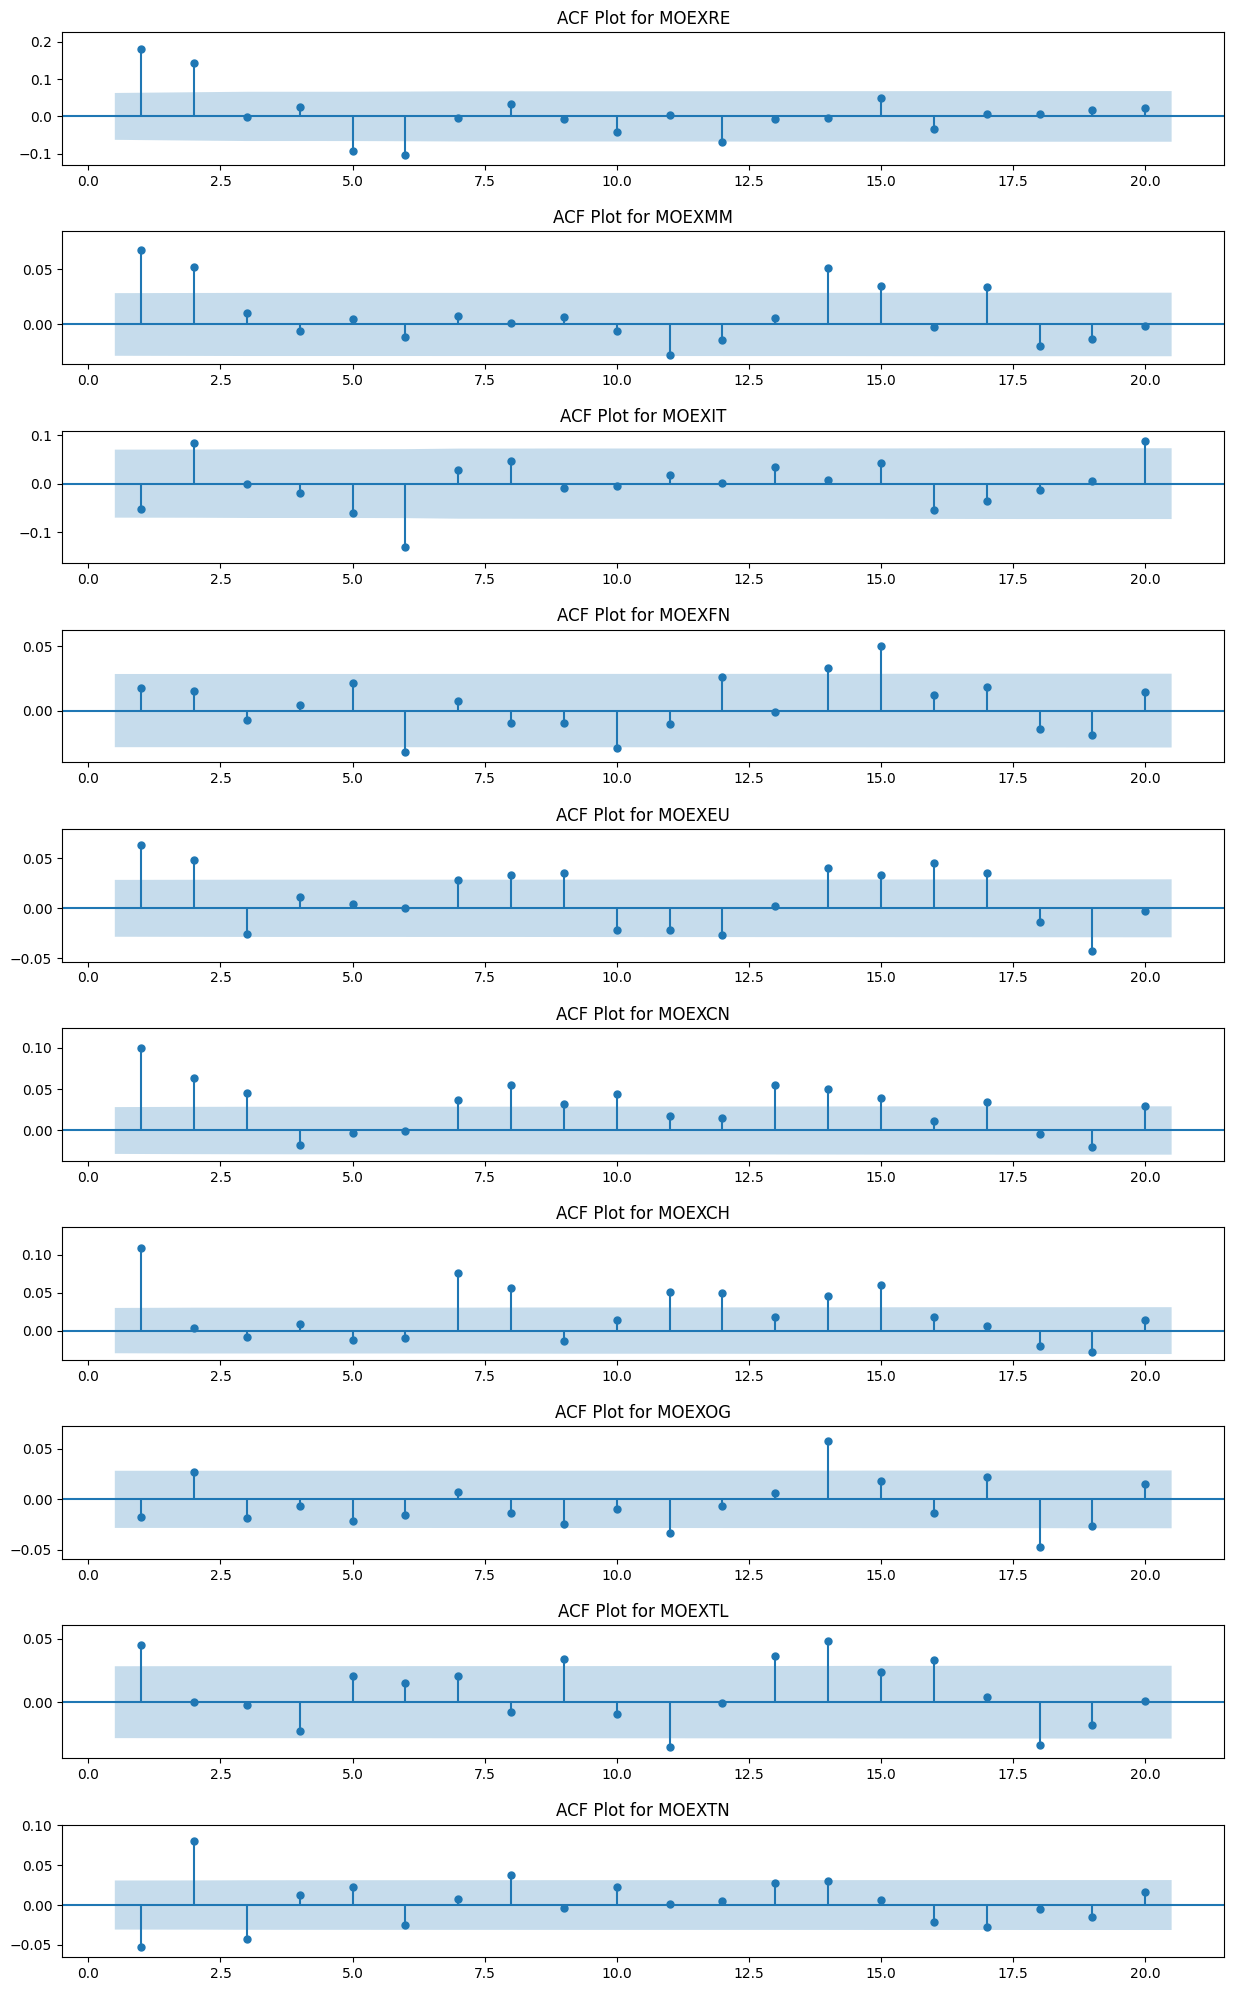

In [7]:
fig, axes = plt.subplots(data.shape[1], figsize=(15, 25), gridspec_kw={"hspace": 0.5, "wspace": 0})

for ax, col in zip(axes, data.columns):
    tsaplots.plot_acf(x=data[col].interpolate(method='time').dropna(), lags=20, zero=False, auto_ylims=True, ax=ax)
    ax.set_title(f'ACF Plot for {col}')

plt.show()

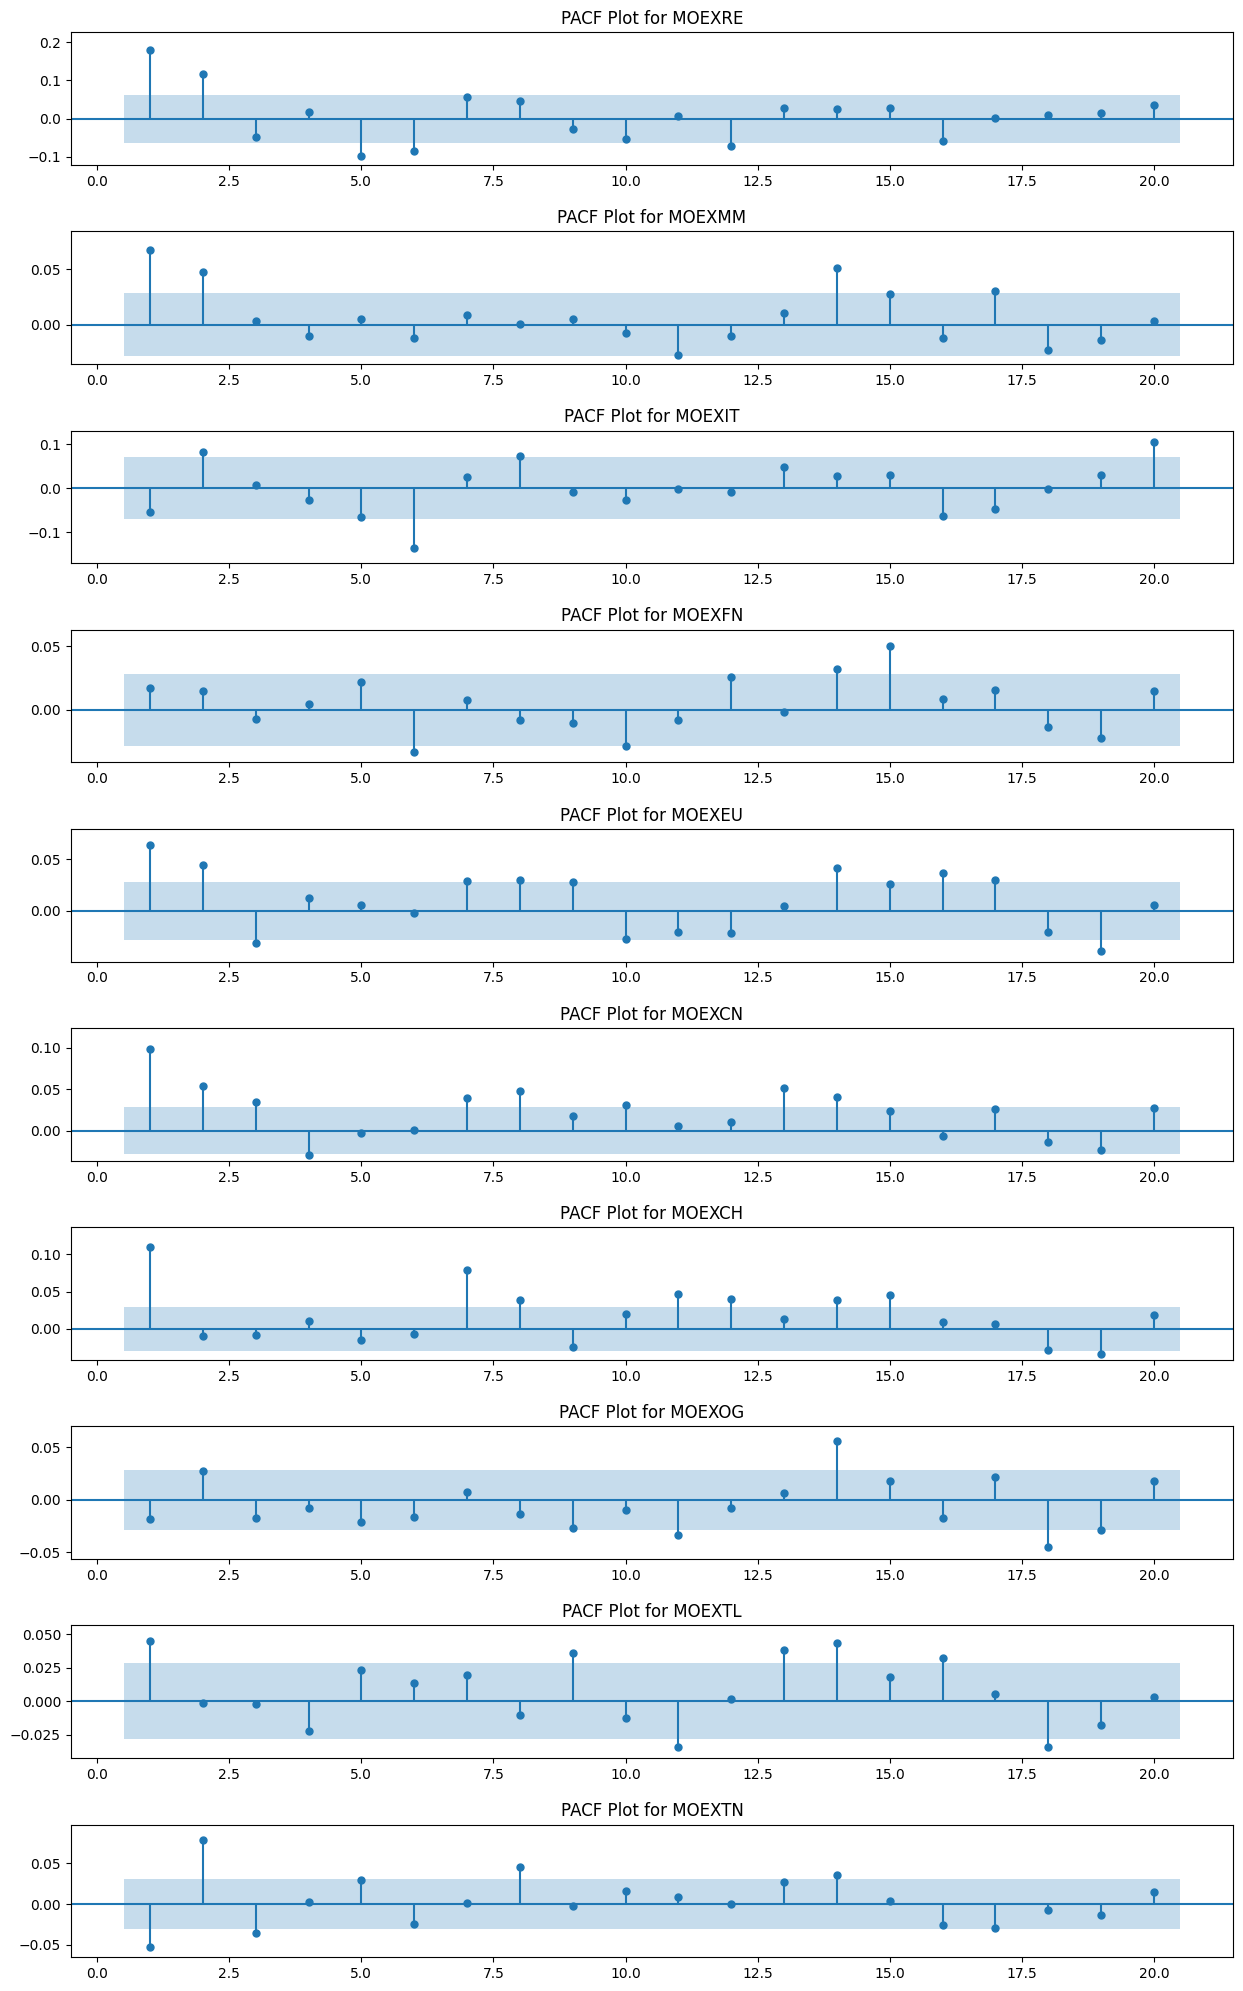

In [8]:
fig, axes = plt.subplots(data.shape[1], figsize=(15, 25), gridspec_kw={"hspace": 0.5, "wspace": 0})

for ax, col in zip(axes, data.columns):
    tsaplots.plot_pacf(x=data[col].interpolate(method='time').dropna(), lags=20, zero=False, auto_ylims=True, ax=ax)
    ax.set_title(f'PACF Plot for {col}')

plt.show()

In [12]:
# корреляция
data.corr()

,MOEXRE,MOEXMM,MOEXIT,MOEXFN,MOEXEU,MOEXCN,MOEXCH,MOEXOG,MOEXTL,MOEXTN
MOEXRE,1.000000,0.602473,0.638999,0.670698,0.651570,0.687781,0.333194,0.605962,0.535800,0.651530
MOEXMM,0.602473,1.000000,0.751631,0.702051,0.678045,0.564604,0.570673,0.794942,0.666703,0.503973
MOEXIT,0.638999,0.751631,1.000000,0.824928,0.753322,0.810743,0.476635,0.765250,0.576984,0.763046
MOEXFN,0.670698,0.702051,0.824928,1.000000,0.697157,0.602231,0.517961,0.788888,0.682151,0.572479
MOEXEU,0.651570,0.678045,0.753322,0.697157,1.000000,0.618397,0.482923,0.708906,0.690689,0.574745
MOEXCN,0.687781,0.564604,0.810743,0.602231,0.618397,1.000000,0.457888,0.587390,0.577833,0.539905
MOEXCH,0.333194,0.570673,0.476635,0.517961,0.482923,0.457888,1.000000,0.593187,0.425085,0.363001
MOEXOG,0.605962,0.794942,0.765250,0.788888,0.708906,0.587390,0.593187,1.000000,0.707318,0.541790
MOEXTL,0.535800,0.666703,0.576984,0.682151,0.690689,0.577833,0.425085,0.707318,1.000000,0.513395
MOEXTN,0.651530,0.503973,0.763046,0.572479,0.574745,0.539905,0.363001,0.541790,0.513395,1.000000
